# DBSCAN

In [2]:
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import DBSCAN
import time
from sklearn import metrics
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from sklearn.cluster import DBSCAN
import hdbscan


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

# Tests avec eps et min_samples au hasard

min_samples laissé par défaut

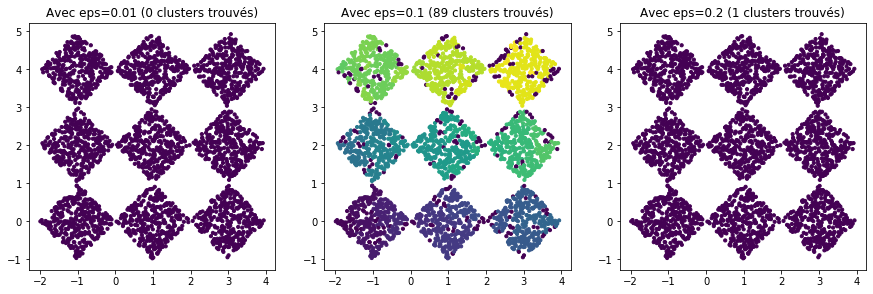

In [27]:
f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,10))

j = 1
for eps in [0.01, 0.1, 0.2]:
    dbscan = DBSCAN(eps=eps).fit(X)
    
    plt.subplot(2, 3, j)
    plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
    plt.title("Avec eps=" + str(eps) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
    j += 1

# Recherche des meilleurs hyper parametre pour diamondss

eps : 0.13 / min_s = 5 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.14 / min_s = 6 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.15 / min_s = 9 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.16 / min_s = 9 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.16 / min_s = 10 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.17 / min_s = 11 / clusters trouvés : 9
[0 0 0 ... 8 8 8]
eps : 0.17 / min_s = 12 / clusters trouvés : 9
[-1 -1 -1 ...  8  8  8]
eps : 0.17 / min_s = 13 / clusters trouvés : 9
[-1 -1 -1 ...  8 -1 -1]
eps : 0.18 / min_s = 12 / clusters trouvés : 9
[0 0 0 ... 8 8 8]


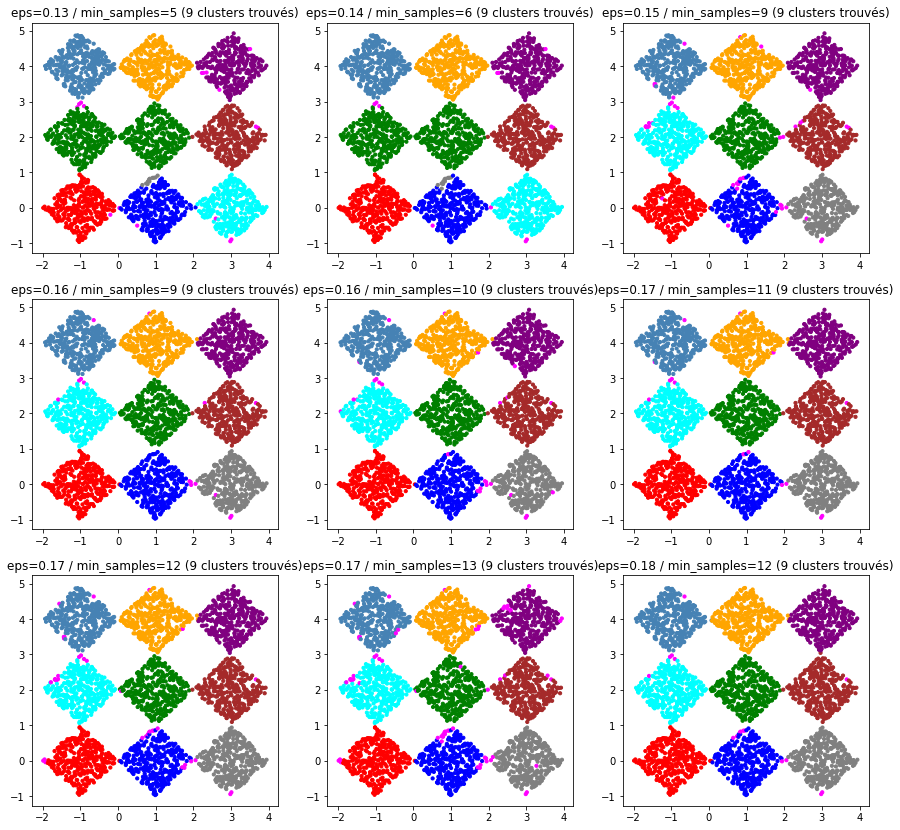

In [67]:


f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []

printed = 0
for eps in range(5, 20):
    eps = eps / 100
    
    for min_samples in range(2, 15):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                (eps, min_samples, metrics.silhouette_score(X, dbscan.labels_, metric='euclidean'))
            )
            values_calinski.append(
                (eps, min_samples, metrics.calinski_harabasz_score(X, dbscan.labels_))
            )
            values_bouldin.append(
                (eps, min_samples, metrics.davies_bouldin_score(X, dbscan.labels_))
            )

        
        score = max(dbscan.labels_) + 1
        
        if (score == 9 and printed < 9):
            
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            print(dbscan.labels_)
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1
            printed += 1


In [74]:
values_silhouette.sort(key= lambda tup: tup[2], reverse = True)
values_calinski.sort(key= lambda tup: tup[2], reverse = True)
values_bouldin.sort(key= lambda tup: tup[2], reverse = True)

print(values_silhouette[0])
print(values_calinski[0])
print(values_bouldin[0])


(0.16, 9, 0.5439748308221402)
(0.18, 12, 4875.199310203855)
(0.13, 7, 10.794255098544719)


Score : 2.231728191125225
eps : 0.16 / min_s = 9 / clusters trouvés : 9
[0 0 0 ... 8 8 8]


Text(0.5, 1.0, 'eps=0.16 / min_samples=9 (9 clusters trouvés)')

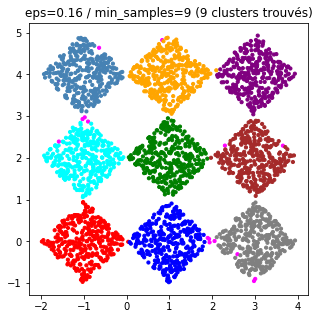

In [80]:
f = open('data/diamond9.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(5, 5))

times = []

eps = 0.16
min_samples = 9

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

print("Score : " + str(metrics.davies_bouldin_score(X, dbscan.labels_)))


score = max(dbscan.labels_) + 1      
print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
print(dbscan.labels_)
#plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")

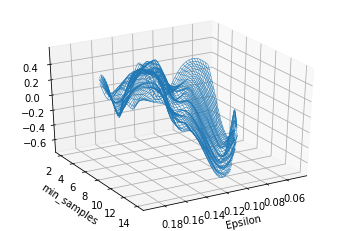

In [60]:

x, y, z = zip(*silhouettes)

z = list(map(float, z))
grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]

grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(grid_x, grid_y, grid_z, cmap="viridis", linewidth=0.5)

ax.view_init(30, 60)

plt.xlabel("Epsilon")
plt.ylabel("min_samples")

plt.show()




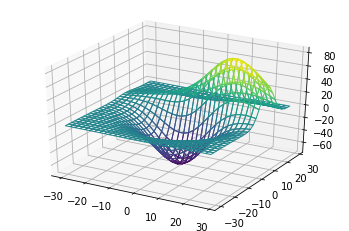

In [58]:
# Normalize to [0,1]
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(norm(Z))
rcount, ccount, _ = colors.shape

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
plt.show()

# Recherche hyper paremtre pour spiral

eps : 0.5 / min_s = 5 / clusters trouvés : 3
eps : 1.0 / min_s = 6 / clusters trouvés : 3
eps : 1.0 / min_s = 7 / clusters trouvés : 3
eps : 1.0 / min_s = 8 / clusters trouvés : 3
eps : 1.5 / min_s = 2 / clusters trouvés : 3
eps : 1.5 / min_s = 3 / clusters trouvés : 3


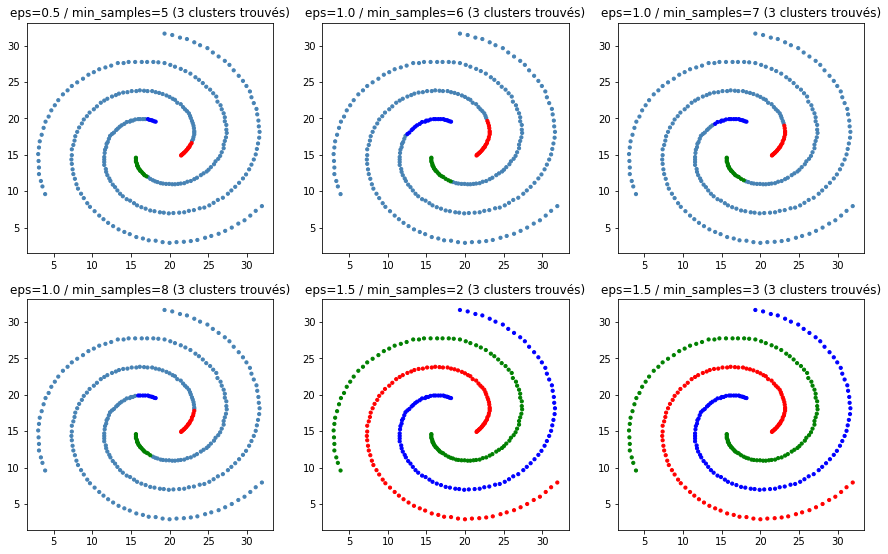

In [5]:
f = open('data/spiral.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'green', 'cyan', 'gray',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []


printed = 0

for eps in range(5, 100, 5):
    eps = eps / 10
    
    for min_samples in range(2, 150):
        start_time = time.process_time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        times.append(time.process_time() - start_time)
        
        if max(dbscan.labels_) >= 1:
            values_silhouette.append(
                metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
            )
            values_calinski.append(
                metrics.calinski_harabasz_score(X, dbscan.labels_)
            )
            values_bouldin.append(
                metrics.davies_bouldin_score(X, dbscan.labels_)
            )
        else:
            values_silhouette.append(0)
            values_calinski.append(0)
            values_bouldin.append(0)
        
        score = max(dbscan.labels_) + 1
        
        if (score == 3 and printed <= 5):
            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
            plt.subplot(10, 3, j)
            #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
            c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
            plt.scatter(data['x'], data['y'], c=c_used, s=10)
            plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
            j += 1
            printed += 1


Score : 5.882022552277642
eps : 1.5 / min_s = 3 / clusters trouvés : 3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Text(0.5, 1.0, 'eps=1.5 / min_samples=3 (3 clusters trouvés)')

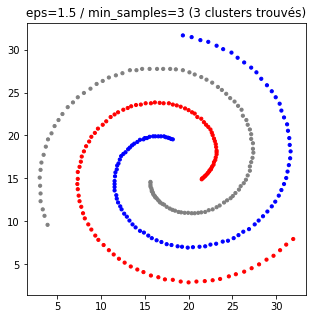

In [79]:
f = open('data/spiral.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'steelblue', 'orange', 'purple',
          'darkblue', 'salmon', 'magenta']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(5,5))

times = []

eps = 1.5
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

print("Score : " + str(metrics.davies_bouldin_score(X, dbscan.labels_)))


score = max(dbscan.labels_) + 1      
print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))
print(dbscan.labels_)
#plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")

# Recherche hyper parametre pour cure

Compliqué pour densité variable (mais normalement ok par rapport au bruit)

eps : 0.01 / min_s = 2 / clusters trouvés : 500
eps : 0.01 / min_s = 3 / clusters trouvés : 115
eps : 0.01 / min_s = 4 / clusters trouvés : 30
eps : 0.01 / min_s = 5 / clusters trouvés : 14
eps : 0.01 / min_s = 6 / clusters trouvés : 23
eps : 0.01 / min_s = 7 / clusters trouvés : 28
eps : 0.01 / min_s = 8 / clusters trouvés : 28
eps : 0.01 / min_s = 9 / clusters trouvés : 27
eps : 0.01 / min_s = 10 / clusters trouvés : 17
eps : 0.01 / min_s = 11 / clusters trouvés : 11
eps : 0.01 / min_s = 12 / clusters trouvés : 9
eps : 0.01 / min_s = 13 / clusters trouvés : 6
^^^^^^^^^^^^^
eps : 0.01 / min_s = 14 / clusters trouvés : 5
eps : 0.011 / min_s = 2 / clusters trouvés : 556
eps : 0.011 / min_s = 3 / clusters trouvés : 138
eps : 0.011 / min_s = 4 / clusters trouvés : 40
eps : 0.011 / min_s = 5 / clusters trouvés : 8
eps : 0.011 / min_s = 6 / clusters trouvés : 9
eps : 0.011 / min_s = 7 / clusters trouvés : 17
eps : 0.011 / min_s = 8 / clusters trouvés : 22
eps : 0.011 / min_s = 9 / clusters 

eps : 0.022 / min_s = 14 / clusters trouvés : 3


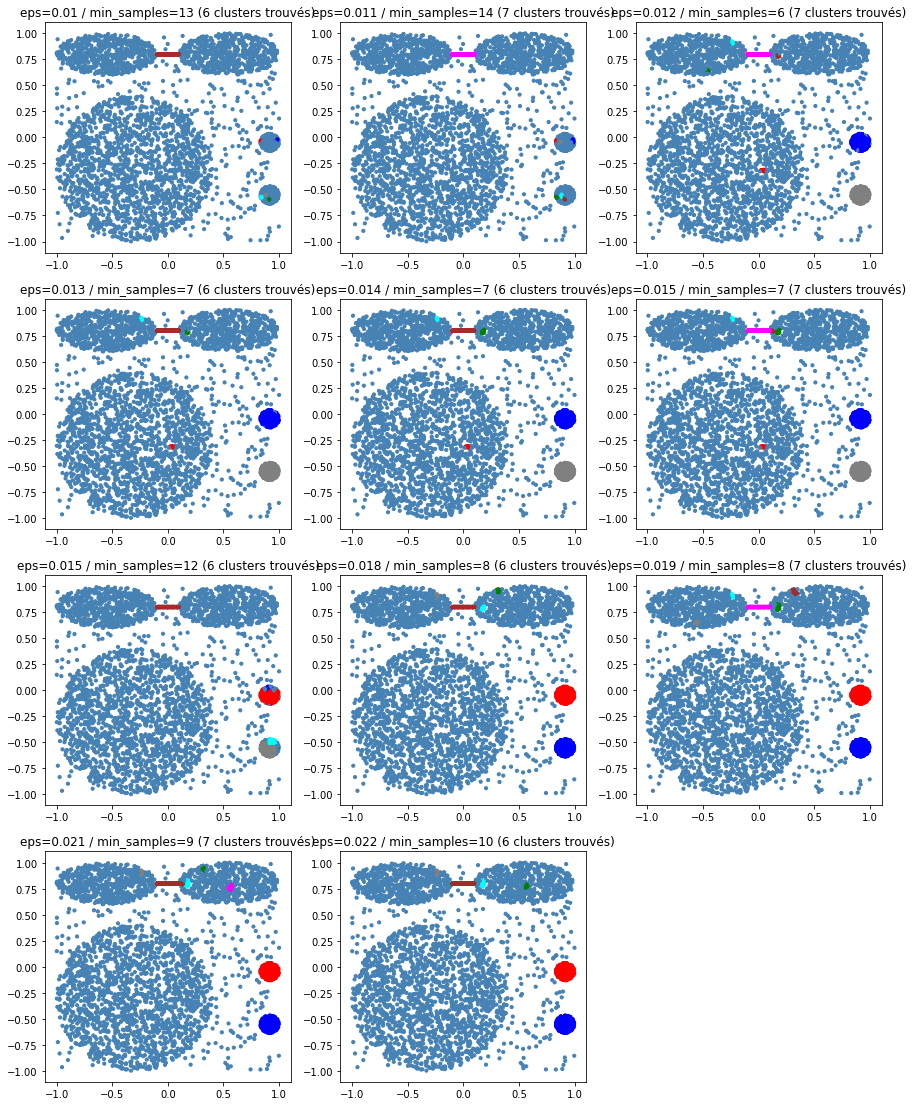

In [6]:
from scipy.io import arff
from sklearn.cluster import DBSCAN

f = open('data/CURE.arff', 'r')
data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', 'steelblue']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

j = 1

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []


printed = 0

for eps in range(10, 10000, 1):
    if printed <= 10:
        eps = eps / 1000

        for min_samples in range(2, 15):
            start_time = time.process_time()
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            times.append(time.process_time() - start_time)

            if max(dbscan.labels_) >= 1:
                values_silhouette.append(
                    metrics.silhouette_score(X, dbscan.labels_, metric='euclidean')
                )
                values_calinski.append(
                    metrics.calinski_harabasz_score(X, dbscan.labels_)
                )
                values_bouldin.append(
                    metrics.davies_bouldin_score(X, dbscan.labels_)
                )
            else:
                values_silhouette.append(0)
                values_calinski.append(0)
                values_bouldin.append(0)

            score = max(dbscan.labels_) + 1

            print("eps : " + str(eps) + " / min_s = " + str(min_samples) + " / clusters trouvés : " + str(score))

            if (score >= 6 and score <= 7):
                print("^^^^^^^^^^^^^")
                plt.subplot(10, 3, j)
                #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
                c_used = [colors[dbscan.labels_[i]] for i in range(len(data))]
                plt.scatter(data['x'], data['y'], c=c_used, s=10)
                plt.title("eps=" + str(eps) + " / min_samples=" + str(min_samples) + " (" + str(max(dbscan.labels_ + 1)) + " clusters trouvés)")
                j += 1
                printed += 1


# HDBSCAN

In [ ]:
f = open('data/diamond9.arff', 'r')

data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', '#000000']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []
j = 1

max_size = 100

printed = 0
for size in range(2, max_size):
    start_time = time.process_time()
    hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)
    times.append(time.process_time() - start_time)
    values_silhouette.append(
        metrics.silhouette_score(X, hdbscan_labels, metric='euclidean')
    )
    values_calinski.append(
        metrics.calinski_harabasz_score(X, hdbscan_labels)
    )
    values_bouldin.append(
        metrics.davies_bouldin_score(X, hdbscan_labels)
    )
    
    if(max(hdbscan_labels + 1) == 9 and printed < 30):
        plt.subplot(10, 3, j)

        #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
        c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
        plt.scatter(data['x'], data['y'], c=c_used, s=10)
        plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")
        j += 1


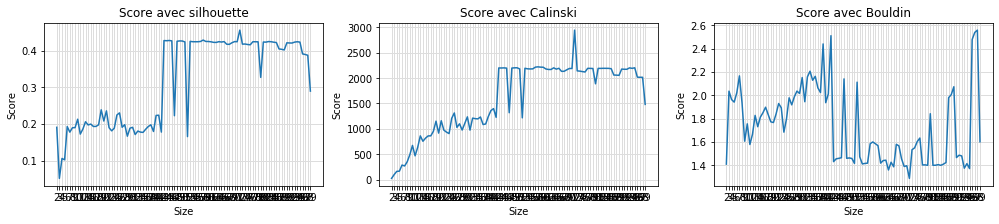

In [65]:
plt.figure(figsize=(17, 3))

plt.subplot(1, 3, 1)

plt.title('Score avec silhouette')
plt.xlabel('Size')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,max_size))
plt.plot(range(2,max_size), values_silhouette)

plt.subplot(1, 3, 2)

plt.title('Score avec Calinski')
plt.xlabel('Size')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,max_size))
plt.plot(range(2,max_size), values_calinski)

plt.subplot(1, 3, 3)

plt.title('Score avec Bouldin')
plt.xlabel('Size')
plt.ylabel('Score')
plt.grid(color='#dddddd', linestyle='-', linewidth=1)
plt.xticks(range(2,max_size))
plt.plot(range(2,max_size), values_bouldin)


Text(0.5, 1.0, 'Size : 8 => 9 clusters trouvés)')

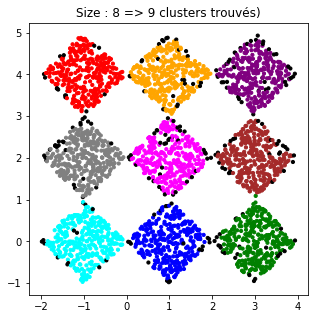

In [54]:
plt.figure(figsize=(5,5))

size = 8

hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)

c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")

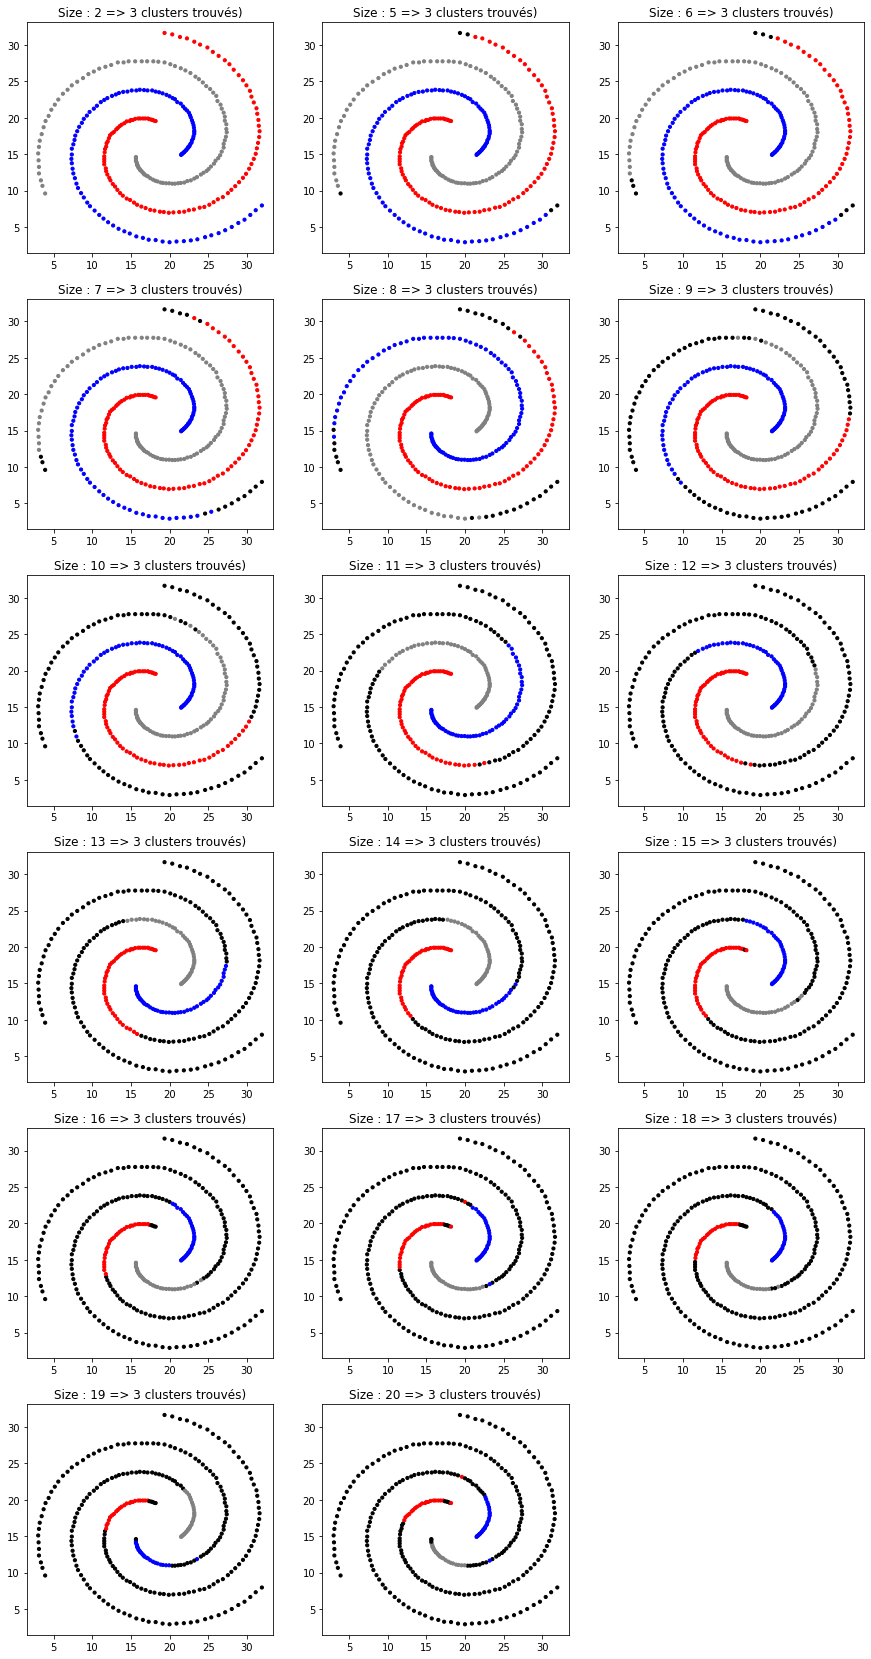

In [77]:

f = open('data/spiral.arff', 'r')

data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', '#000000']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []
j = 1

max_size = 100

printed = 0
for size in range(2, max_size):
    start_time = time.process_time()
    hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size).fit_predict(X)
    times.append(time.process_time() - start_time)
    """
    if (max(hdbscan_labels)> 1):
        values_silhouette.append(
            metrics.silhouette_score(X, hdbscan_labels, metric='euclidean')
        )
        values_calinski.append(
            metrics.calinski_harabasz_score(X, hdbscan_labels)
        )
        values_bouldin.append(
            metrics.davies_bouldin_score(X, hdbscan_labels)
        )
    else:
        values_silhouette.append(0)
        values_calinski.append(0)
        values_bouldin.append(0)
    """
    if(max(hdbscan_labels + 1) == 3 and printed < 30):
        plt.subplot(10, 3, j)

        #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
        c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
        plt.scatter(data['x'], data['y'], c=c_used, s=10)
        plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")
        j += 1


In [8]:
def progressBar(value, endvalue, bar_length=20):

    percent = float(value) / endvalue
    arrow = '-' * int(round(percent * bar_length)-1) + '>'
    spaces = ' ' * (bar_length - len(arrow))

    sys.stdout.write("\rPercent: [{0}] {1}%".format(arrow + spaces, int(round(percent * 100))))
    sys.stdout.flush()

Percent: [----------------->  ] 92%

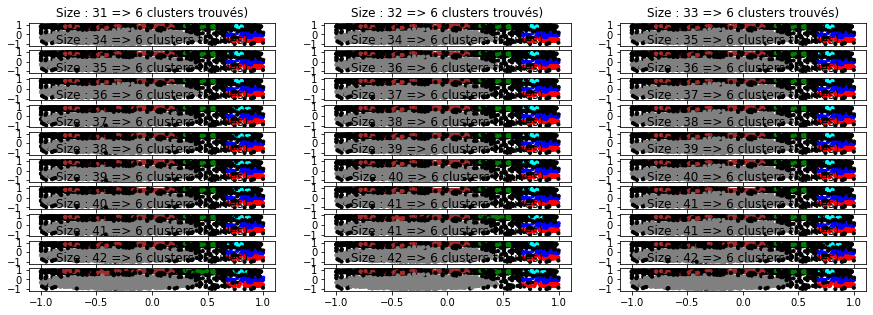

In [12]:

f = open('data/CURE.arff', 'r')

data, meta = arff.loadarff(f)


colors = ['red', 'blue', 'gray', 'cyan', 'green',
          'brown', 'magenta', 'orange', 'purple',
          'darkblue', 'salmon', '#000000']

X = [[data[i]['x'], data[i]['y']] for i in range(len(data))]

plt.figure(figsize=(15,50))

values_silhouette = []
values_calinski = []
values_bouldin = []

times = []
j = 1

max_size = 50
min_samples = 50
printed = 0


progress = 1

for size in range(2, max_size):
    for min_sample in range(2, min_samples):
        progressBar(progress, min_samples*max_size)
        progress += 1
        start_time = time.process_time()
        hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=size, min_samples=min_sample).fit_predict(X)
        times.append(time.process_time() - start_time)

        if(max(hdbscan_labels + 1) == 6):
            values_silhouette.append(
                (size, min_samples, metrics.silhouette_score(X, hdbscan_labels, metric='euclidean'))
            )
            values_calinski.append(
                (size, min_samples, metrics.calinski_harabasz_score(X, hdbscan_labels))
            )
            values_bouldin.append(
                (size, min_samples, metrics.davies_bouldin_score(X, hdbscan_labels))
            )
            
            if printed < 30:
                plt.subplot(100, 3, j)

                #plt.scatter(data['x'], data['y'], c=dbscan.labels_, s=10)
                c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
                plt.scatter(data['x'], data['y'], c=c_used, s=10)
                plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")
                j += 1
                printed += 1
        



In [13]:
values_silhouette.sort(key= lambda tup: tup[2], reverse = True)
values_calinski.sort(key= lambda tup: tup[2], reverse = True)
values_bouldin.sort(key= lambda tup: tup[2], reverse = True)

print(values_silhouette[0])
print(values_calinski[0])
print(values_bouldin[0])


(41, 50, 0.2534705146485455)
(41, 50, 1452.280790148749)
(36, 50, 2.140455033636025)


Text(0.5, 1.0, 'Size : 8 => 4 clusters trouvés)')

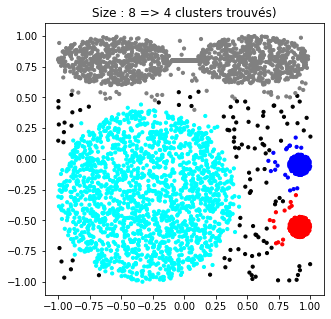

In [15]:
plt.figure(figsize=(5,5))

size = 8

hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=36, min_samples=50).fit_predict(X)

c_used = [colors[hdbscan_labels[i] % len(colors)] for i in range(len(data))]
plt.scatter(data['x'], data['y'], c=c_used, s=10)
plt.title("Size : " + str(size) + " => " + str(max(hdbscan_labels + 1)) + " clusters trouvés)")